### Inicialización

In [1]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt

#Importar imagen
image = cv2.imread('8.jpeg')

#Poner imagen en RGB
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

#Hacer copia de la imagen para trabajar con ella
lane_image = np.copy(image)

#Convertir la imagen en blanco y negro
gray = cv2.cvtColor(lane_image, cv2.COLOR_RGB2GRAY)

#Crear imagen en HSV
image_hsv = cv2.cvtColor(lane_image, cv2.COLOR_RGB2HSV)

#Definir region de interes
frac_lim_inf = 1/2
frac_lim_sup = 4/5
def region_of_interest(image):
    height = image.shape[0]
    length = image.shape[1]
    inf = round(frac_lim_inf*height)
    sup = round(frac_lim_sup*height)
    polygons = np.array([
        [(0,inf),(length,inf),(length,sup),(0,sup)]
    ])
    mask = np.zeros_like(image)
    cv2.fillPoly(mask,polygons,255)
    masked_image = cv2.bitwise_and(image,mask)
    return masked_image

### Lineas blancas

In [2]:
#Definir rango lineas blancas
lowerBound_white = (0,0,130)
upperBound_white = (255,80,255)

#Extraer seccion blanca
white = cv2.inRange(image_hsv, lowerBound_white, upperBound_white)

#Filtro gausiano
n=9
blur = cv2.GaussianBlur(white, (n,n), 0) 

#Reconocer bordes 
canny = cv2.Canny(blur, 80, 160)

#Aplicar la region de interés
cropped_image = region_of_interest(canny);

#Encontrar lineas
lines_white = cv2.HoughLinesP(cropped_image, 2, np.pi/180, 80, np.array([]), minLineLength=30, maxLineGap=3)

### Lineas amarillas

In [3]:
#Definir rango lineas amarillas
lowerBound_yellow = (8,100,100)
upperBound_yellow = (34,255,255)

#Extraer seccion amarilla
yellow = cv2.inRange(image_hsv, lowerBound_yellow, upperBound_yellow)

#Filtro gausiano
n=9
blur = cv2.GaussianBlur(yellow, (n,n), 0) 

#Reconocer bordes 
canny = cv2.Canny(blur, 80, 160)

#Aplicar la region de interés
cropped_image = region_of_interest(canny);

#Encontrar lineas
lines_yellow = cv2.HoughLinesP(cropped_image, 2, np.pi/180, 80, np.array([]), minLineLength=30, maxLineGap=3)

### Otras lineas

In [4]:
#Filtro gausiano
n=5
blur = cv2.GaussianBlur(gray, (n,n), 0)  

#Deteccion de bordes
canny = cv2.Canny(blur, 80, 160)

#Aplicar region de interes
cropped_image = region_of_interest(canny);

#Encontrar lineas
lines = cv2.HoughLinesP(cropped_image, 2, np.pi/180, 80, np.array([]), minLineLength=30, maxLineGap=3)

### Creacion de imagen

(0.7288135593220338, -90, (255, 255, 0))
(0.84, -171, (255, 255, 0))
(0.7551020408163265, -114, (255, 255, 0))
(0.7636363636363637, -122, (255, 255, 0))
(0.3050847457627119, 174, (255, 255, 255))
(0.21212121212121213, 235, (255, 255, 255))
(0.3010752688172043, 184, (255, 255, 255))
(0.189873417721519, 256, (255, 255, 255))
(0.3176470588235294, 158, (255, 255, 255))
(0.2, 248, (255, 255, 255))
(0.3, 185, (255, 255, 255))
(0.2916666666666667, 188, (255, 255, 255))
(0.29411764705882354, 189, (255, 255, 255))
(0.3333333333333333, 139, (255, 255, 255))
(0.2967032967032967, 184, (255, 0, 0))
(0.3, 185, (255, 0, 0))
(0.1956521739130435, 250, (255, 0, 0))
(0.3333333333333333, 144, (255, 0, 0))
(0.21428571428571427, 232, (255, 0, 0))
(0.2222222222222222, 223, (255, 0, 0))
(0.3225806451612903, 150, (255, 0, 0))
(0.3225806451612903, 157, (255, 0, 0))
(0.21052631578947367, 233, (255, 0, 0))
(0.28888888888888886, 194, (255, 0, 0))
line
(0.7288135593220338, -90, (255, 255, 0))
new_line
(0.7288135593

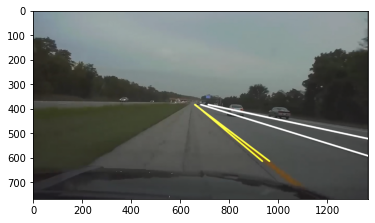

In [5]:
#Funcion de creacion de imagen con lineas
def display_lines(image, lines, lines_yellow, lines_white):
    #Parametros
    line_image = np.zeros_like(image)
    n = 0
    angle = 10
    height = image.shape[0]
    param = []
    new_lines = []
    slope_error = 30
    intercept_error = 30
    #Lineas amarillas
    if lines_yellow is not None:
        color = (255,255,0)
        for line in lines_yellow:
            x1, y1, x2, y2 = line.reshape(4)
            theta = (np.arctan((y2-y1)/(x2-x1)))*180/np.pi;
            if (theta>angle or theta<-angle) and (x1!=x2):
                slope = ((y2-y1)/(x2-x1))
                intercept = int(y1-slope*x1)
                param.append((slope,intercept, color))
                #Lineas amarillas
    if lines_white is not None:
        color = (255,255,255)
        for line in lines_white:
            x1, y1, x2, y2 = line.reshape(4)
            theta = (np.arctan((y2-y1)/(x2-x1)))*180/np.pi;
            if (theta>angle or theta<-angle) and (x1!=x2):
                slope = ((y2-y1)/(x2-x1))
                intercept = int(y1-slope*x1)
                param.append((slope,intercept, color))
    #Otras lineas
    if lines is not None:
        color = (255,0,0)
        for line in lines:
            x1, y1, x2, y2 = line.reshape(4)
            theta = (np.arctan((y2-y1)/(x2-x1)))*180/np.pi;
            if (theta>angle or theta<-angle) and (x1!=x2):
                slope = ((y2-y1)/(x2-x1))
                intercept = int(y1-slope*x1)
                param.append((slope,intercept, color))
    for line in param:
        print(line)
    if len(param) is not 0:
        new_lines.append(param[0])
        for line in param:
            print("line")
            print(line)
            slope = line[0]
            intercept = line[1]
            new_lines2 = new_lines
            i=0
            for new_line in new_lines2:
                print("new_line")
                print(new_line)
                max_slope = new_line[0]+abs(new_line[0])*slope_error/100
                min_slope = new_line[0]-abs(new_line[0])*slope_error/100
                max_intercept = new_line[1]+abs(new_line[1])*intercept_error/100
                min_intercept = new_line[1]-abs(new_line[1])*intercept_error/100
                print("limits")
                print(min_slope, max_slope, min_intercept, max_intercept)
                if ((slope<max_slope)&(slope>min_slope)&(intercept<max_intercept)&(intercept>min_intercept)):
                    print("si")
                    found = True
                    new_slope = (slope+new_line[0])/2
                    new_intercept = (intercept+new_line[1])/2
                    new_line = (new_slope, new_intercept, new_line[2])
                    new_lines[i]=new_line
                    break
                else:
                    print("no")
                    found = False
                i=i+1
            if not found:
                new_lines.append(line)
                
    print("new_lines")
    print(new_lines)
    for line in new_lines:
        slope = line[0]
        intercept = line[1]
        y1_new = round(frac_lim_sup*height)
        y2_new = round(frac_lim_inf*height) 
        x1_new = round((y1_new-intercept)/slope)
        x2_new = round((y2_new-intercept)/slope)        
        cv2.line(line_image, (x1_new, y1_new), (x2_new, y2_new), line[2], 5)
        print(line[2])
    return line_image

#Aplicacion de la funcion
line_image = display_lines(lane_image, lines, lines_yellow, lines_white)

#Mezclar la imagen de lineas con la original
mixed_image = cv2.addWeighted(lane_image, 0.8, line_image, 1, 1)

plt.imshow(mixed_image)


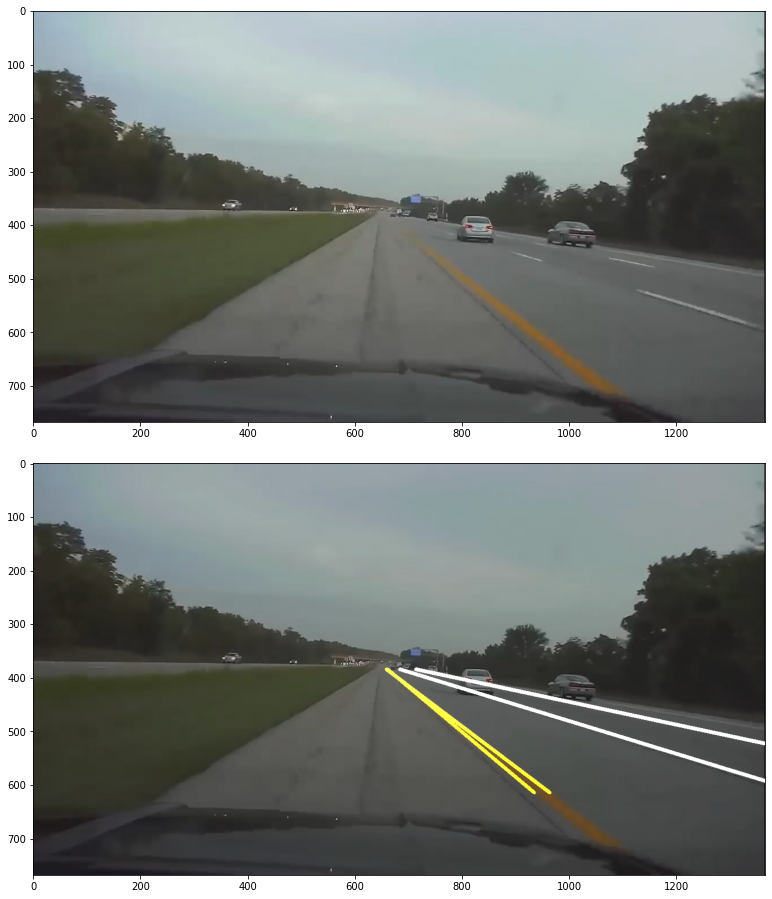

In [6]:
plt.figure(6)
plt.subplot(2,1,1),plt.imshow(lane_image)
plt.subplot(2,1,2),plt.imshow(mixed_image)
plt.subplots_adjust(top=4, bottom=1, left=1, right=5, hspace=0.1, wspace=0.2)